<h1>Classificação de imagens</h1>

In [3]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import glob

cv2.__version__

'4.0.0'

In [4]:


directory = 'models/deep-learning-opencv/'
prototxt = directory+'bvlc_googlenet.prototxt'
model = directory+'bvlc_googlenet.caffemodel'
labels = directory+'synset_words.txt'

rows = open(labels).read().strip().split('\n')
classes = [r[r.find(' ') + 1:].split(',')[0] for r in rows]
print('Classes', classes[0:5])

net = cv2.dnn.readNetFromCaffe(prototxt, model)

Classes ['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead']


Tempo de predicao: 0.042072
Probabilidade {:.5} 98.94946217536926
Tempo de predicao: 0.028471
Probabilidade {:.5} 85.16182899475098
Tempo de predicao: 0.030401
Probabilidade {:.5} 80.13341426849365
Tempo de predicao: 0.027267
Probabilidade {:.5} 94.10008788108826


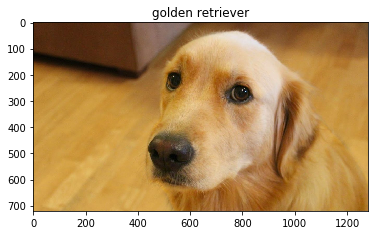

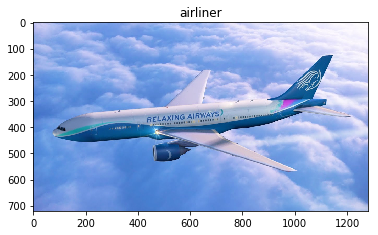

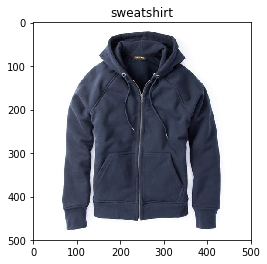

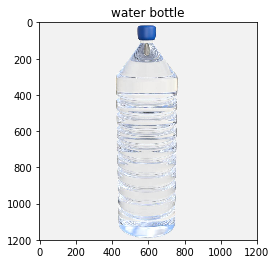

In [5]:
images = [cv2.imread(file) for file in glob.glob('dataset/*.jpg')]
blobs = [cv2.dnn.blobFromImage(image, 1, (224, 244), (104, 117, 123)) for image in images]

for blob, image in zip(blobs,images):
    #Runs the prediction
    net.setInput(blob)
    start = time.time()
    preds = net.forward()
    end = time.time()

    print('Tempo de predicao: {:.5}'.format(end-start))
    
    class_indexes = np.argsort(preds[0])[::-1][:5]
    fig, axis = plt.subplots()
    axis.set_title(classes[class_indexes[0]])
    axis.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    print('Probabilidade {:.5}', preds[0][class_indexes[0]]*100)

<h1>Detecção de objetos</h1>

In [6]:
directory = 'models/object-detection-deep-learning/'
prototxt = directory+'MobileNetSSD_deploy.prototxt.txt'
model = directory+'MobileNetSSD_deploy.caffemodel'

classes = ["background", "aeroplane", "bicycle", "bird", "boat",
    "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
    "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
    "sofa", "train", "tvmonitor"]

colors = np.random.uniform(0, 255, size=(len(classes), 3))

net = cv2.dnn.readNetFromCaffe(prototxt, model)


In [10]:
#images2 = [cv2.imread(file) for file in glob.glob(directory2+'images/*')]
#image2 = images2[0]

image_file_template = 'images/example_0{}.jpg'.format(1)
print(image_file_template)
images = [cv2.imread(directory+'images/example_0{}.jpg'.format(i)) for i in range(1, 7)]
#plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

sizes = [image.shape[:2] for image in images]
blobs = [cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5) for image in images]
#print(blob.shape)

detect_per_image = []
for blob in blobs:
    net.setInput(blob)
    detections = net.forward()
    detect_per_image.append(detections)

print(detections.shape)
print(detections)

images/example_01.jpg
(1, 1, 3, 7)
[[[[ 0.          9.          0.48388875  0.7291163   0.5006136
     0.9099777   0.7894964 ]
   [ 0.         12.          0.8308758   0.49645746  0.6314064
     0.6673778   0.8806592 ]
   [ 0.         15.          0.9999039   0.11581635  0.19091555
     0.45638365  0.84093094]]]]


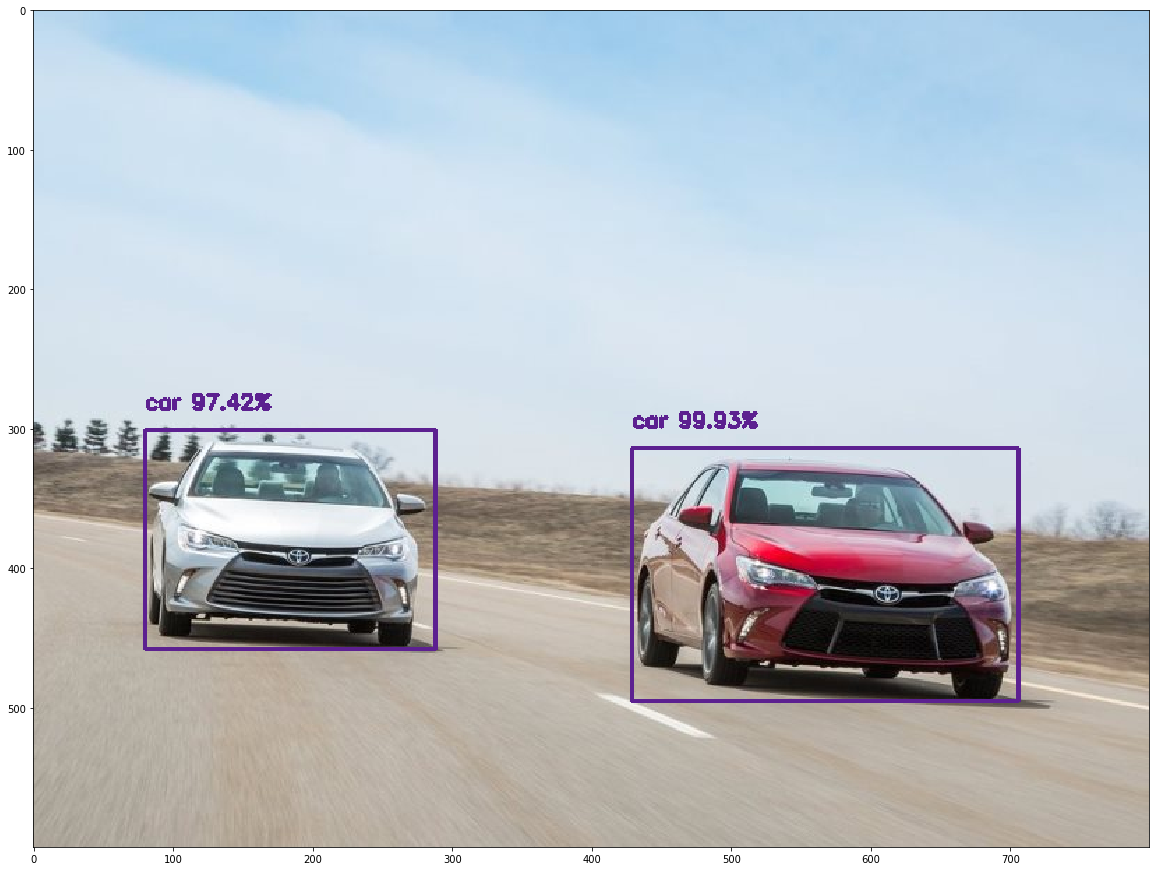

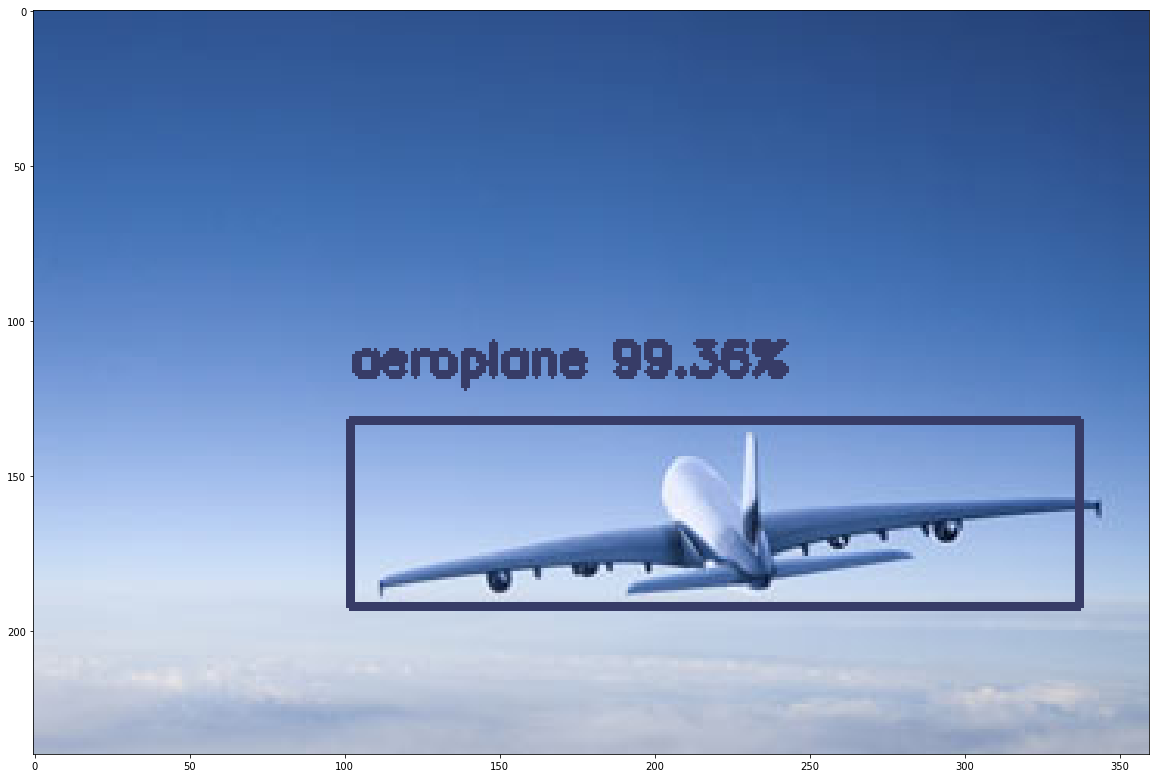

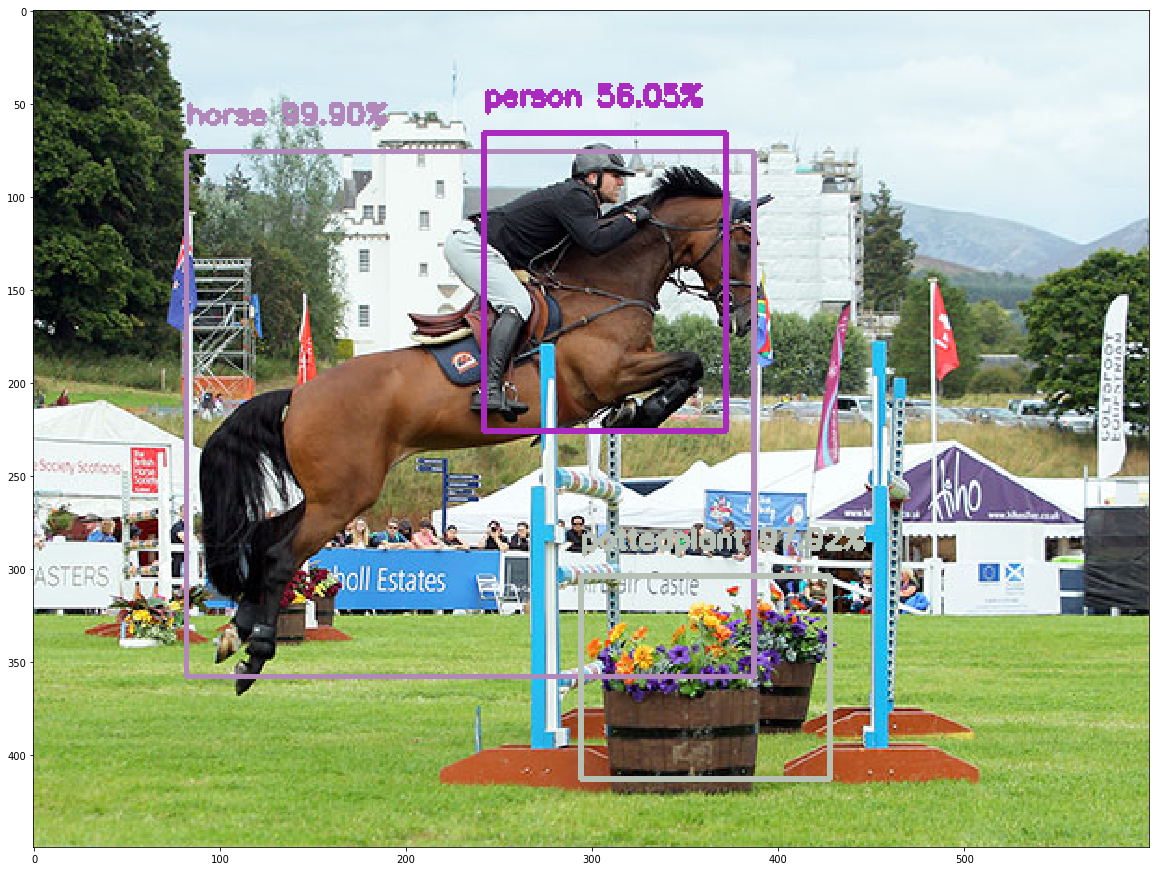

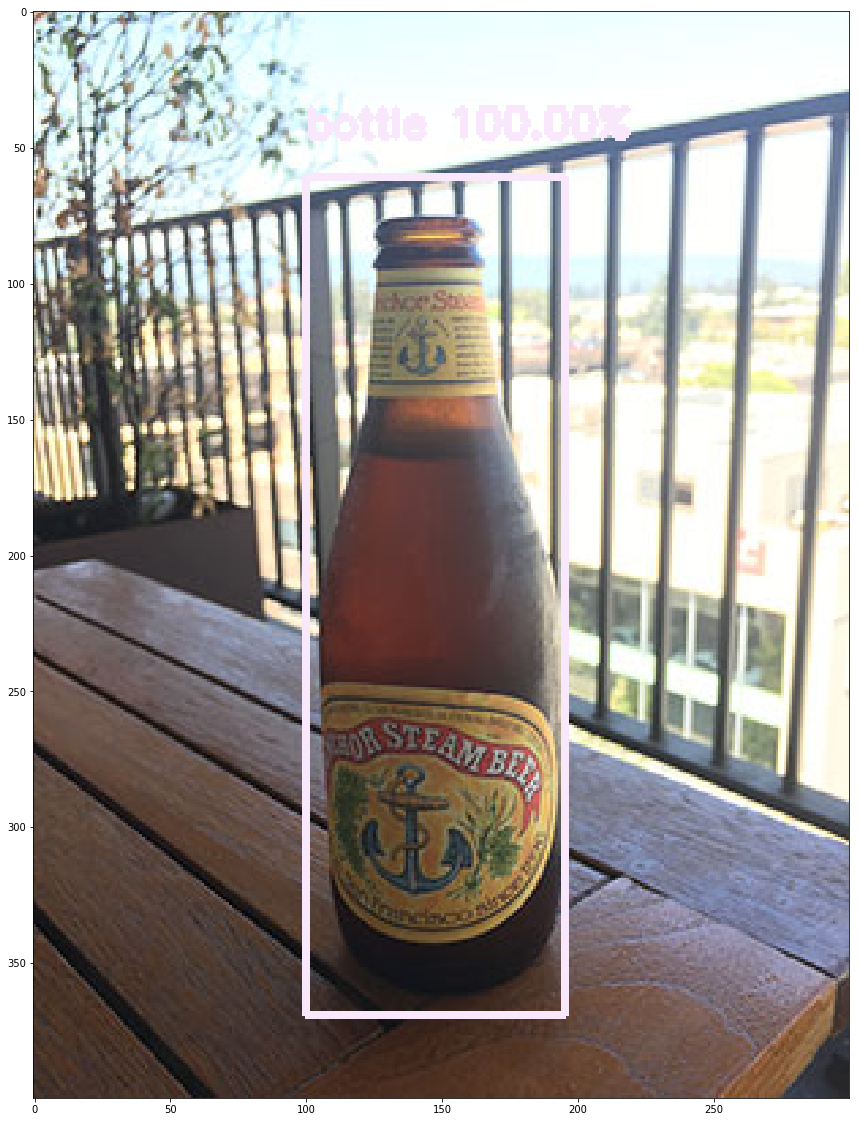

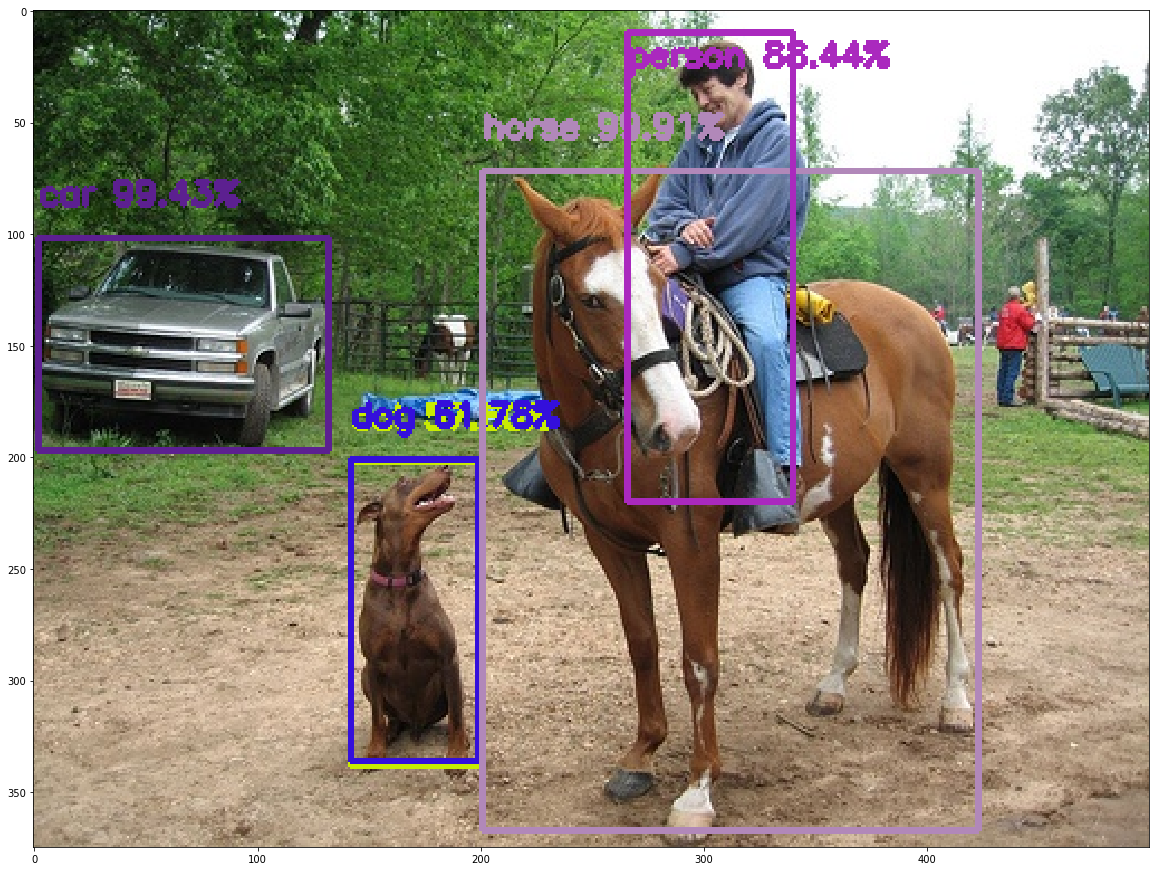

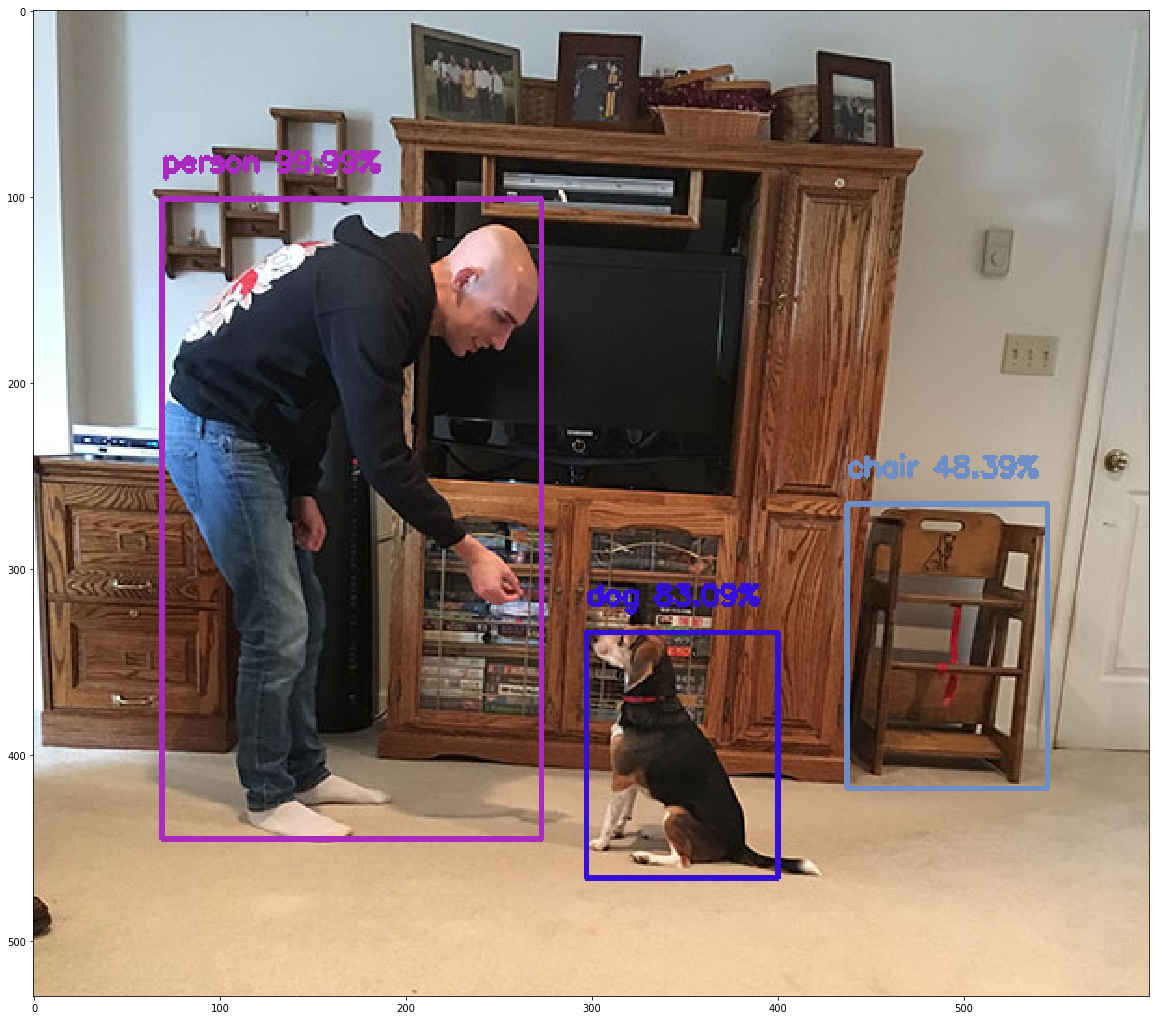

In [14]:
conf_thresh = 0.2


for image, blob, size, detections in zip(images, blobs, sizes, detect_per_image):
    fig, axis = plt.subplots(figsize=(20,20))
    
    h = size[0]
    w = size[1]
    
    for i in np.arange(0, detections.shape[2]):
        
        #Confianca da predicao
        confidence = detections[0, 0, i, 2]

        if(confidence > conf_thresh):
            #Indice da classe (p/ descoberta do label e da cor)
            class_index = int(detections[0, 0, i, 1])

            #Numeros que representan a bounding box
            bnd_box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])

            #Converte numeros da bounding box em coordenadas da imagem
            start_x, start_y, end_x, end_y = bnd_box.astype('int')
            
            #Pega o label da classe e monta o texto que vai aparecer no quadro 
            class_label = classes[class_index]
            output_label = '{} {:.2f}%'.format(class_label, confidence*100)
            
            #Desenha um retangulo na regiao da bounding box
            cv2.rectangle(image, (start_x, start_y), (end_x, end_y), colors[class_index], 2)
            
            #Texto que sera colocado na bounding box
            text_y = start_y - 15 if start_y-15 > 15 else start_y + 15

            cv2.putText(image, output_label, (start_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 
                        colors[class_index], 2)
        
    axis.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))     